In [229]:
import pandas as pd

In [275]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv ('UCI_Credit_Card.csv',index_col='ID')

In [276]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [277]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)

In [278]:
# выведите, что за типы переменных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6                     30000 non-null float64
PAY_AMT1  

In [279]:
#сколько пропусков - пустые значения в данном датафрейме отсутствуют

In [280]:
# для численных значений посчитайте пару статистик (в свободной форме)
# максимальный возраст
df['AGE'].max()

79

In [281]:
# для численных значений посчитайте пару статистик (в свободной форме)
# среднее значение счета BILL_ATM3
df['BILL_AMT3'].mean()

47013.1548

In [282]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

len(df[
    (df['SEX']==2) & (df ['EDUCATION']==2) 
])

8656

In [283]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
    'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default.payment.next.month']].groupby('default.payment.next.month').median()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,
0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


In [284]:
                                  #ВОПРОС!!!
# можно ли в данном запросе перечислить показатели, начинающихся на BILL_ и PAY_, в виде листа?

In [285]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

ptable=df.pivot_table ('EDUCATION','SEX','MARRIAGE','count' )
ptable

MARRIAGE,0,1,2,3
SEX,,,,
1,14,5190,6553,131
2,40,8469,9411,192


In [286]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL<=700000 и >400000
# принимает значение F, если значение c >700000

df['newclmn'] = df['LIMIT_BAL'].map(lambda s: 'A' if s<=10000 
                                    else 'B' if (s<=100000 and s>10000)
                                    else 'C' if (s<=200000 and s>100000)
                                    else 'D' if (s<=400000 and s>200000)
                                    else 'E' if (s<=700000 and s>400000)
                                    else 'F')
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,newclmn
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,B
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,C
3,90000.0,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,B
4,50000.0,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,B
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,B
6,50000.0,1,1,2,37,0,0,0,0,0,...,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,B
7,500000.0,1,1,2,29,0,0,0,0,0,...,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0,E
8,100000.0,2,2,2,23,0,-1,-1,0,0,...,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,B
9,140000.0,2,3,1,28,0,0,2,0,0,...,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0,C


In [287]:
%matplotlib inline

In [288]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

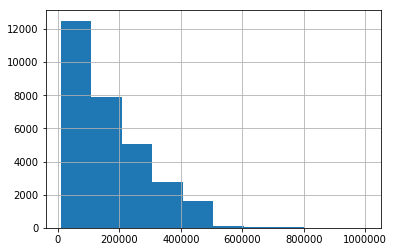

In [289]:
df['LIMIT_BAL'].hist(bins = 10)

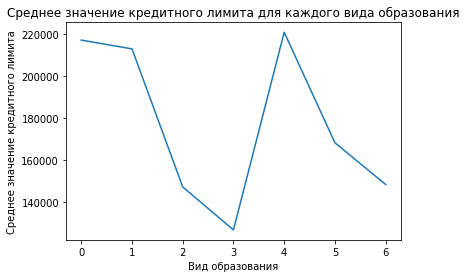

In [290]:
# (8) построить среднее значение кредитного лимита для каждого вида образования 
# и для каждого пола
# график необходимо сделать очень широким (на весь экран)
import matplotlib.pyplot as plt

df_edu=df[['EDUCATION', 'LIMIT_BAL']].groupby('EDUCATION').mean()
plt.plot (df_edu)
plt.title('Cреднее значение кредитного лимита для каждого вида образования')
plt.ylabel('Cреднее значение кредитного лимита')
plt.xlabel('Вид образования')
plt.show()

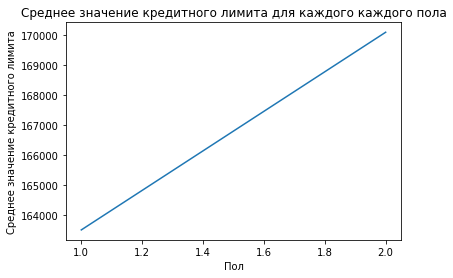

In [291]:
df_sex=df[['SEX', 'LIMIT_BAL']].groupby('SEX').mean()
plt.plot (df_sex)
plt.title('Cреднее значение кредитного лимита для каждого каждого пола')
plt.ylabel('Cреднее значение кредитного лимита')
plt.xlabel('Пол')
plt.show()

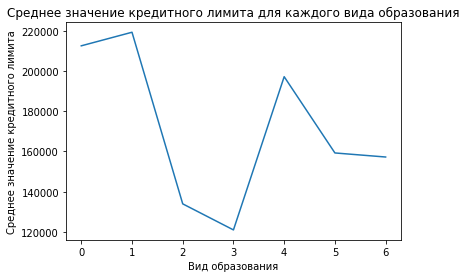

In [292]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов

df_men=df[df['SEX'] == 1]
df_edu1=df_men[['EDUCATION', 'LIMIT_BAL']].groupby('EDUCATION').mean()
plt.plot (df_edu1)
plt.title('Cреднее значение кредитного лимита для каждого вида образования')
plt.ylabel('Cреднее значение кредитного лимита')
plt.xlabel('Вид образования')
plt.show()

In [296]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn as sns

In [294]:
df_numeric = df.drop(['newclmn'], axis=1)

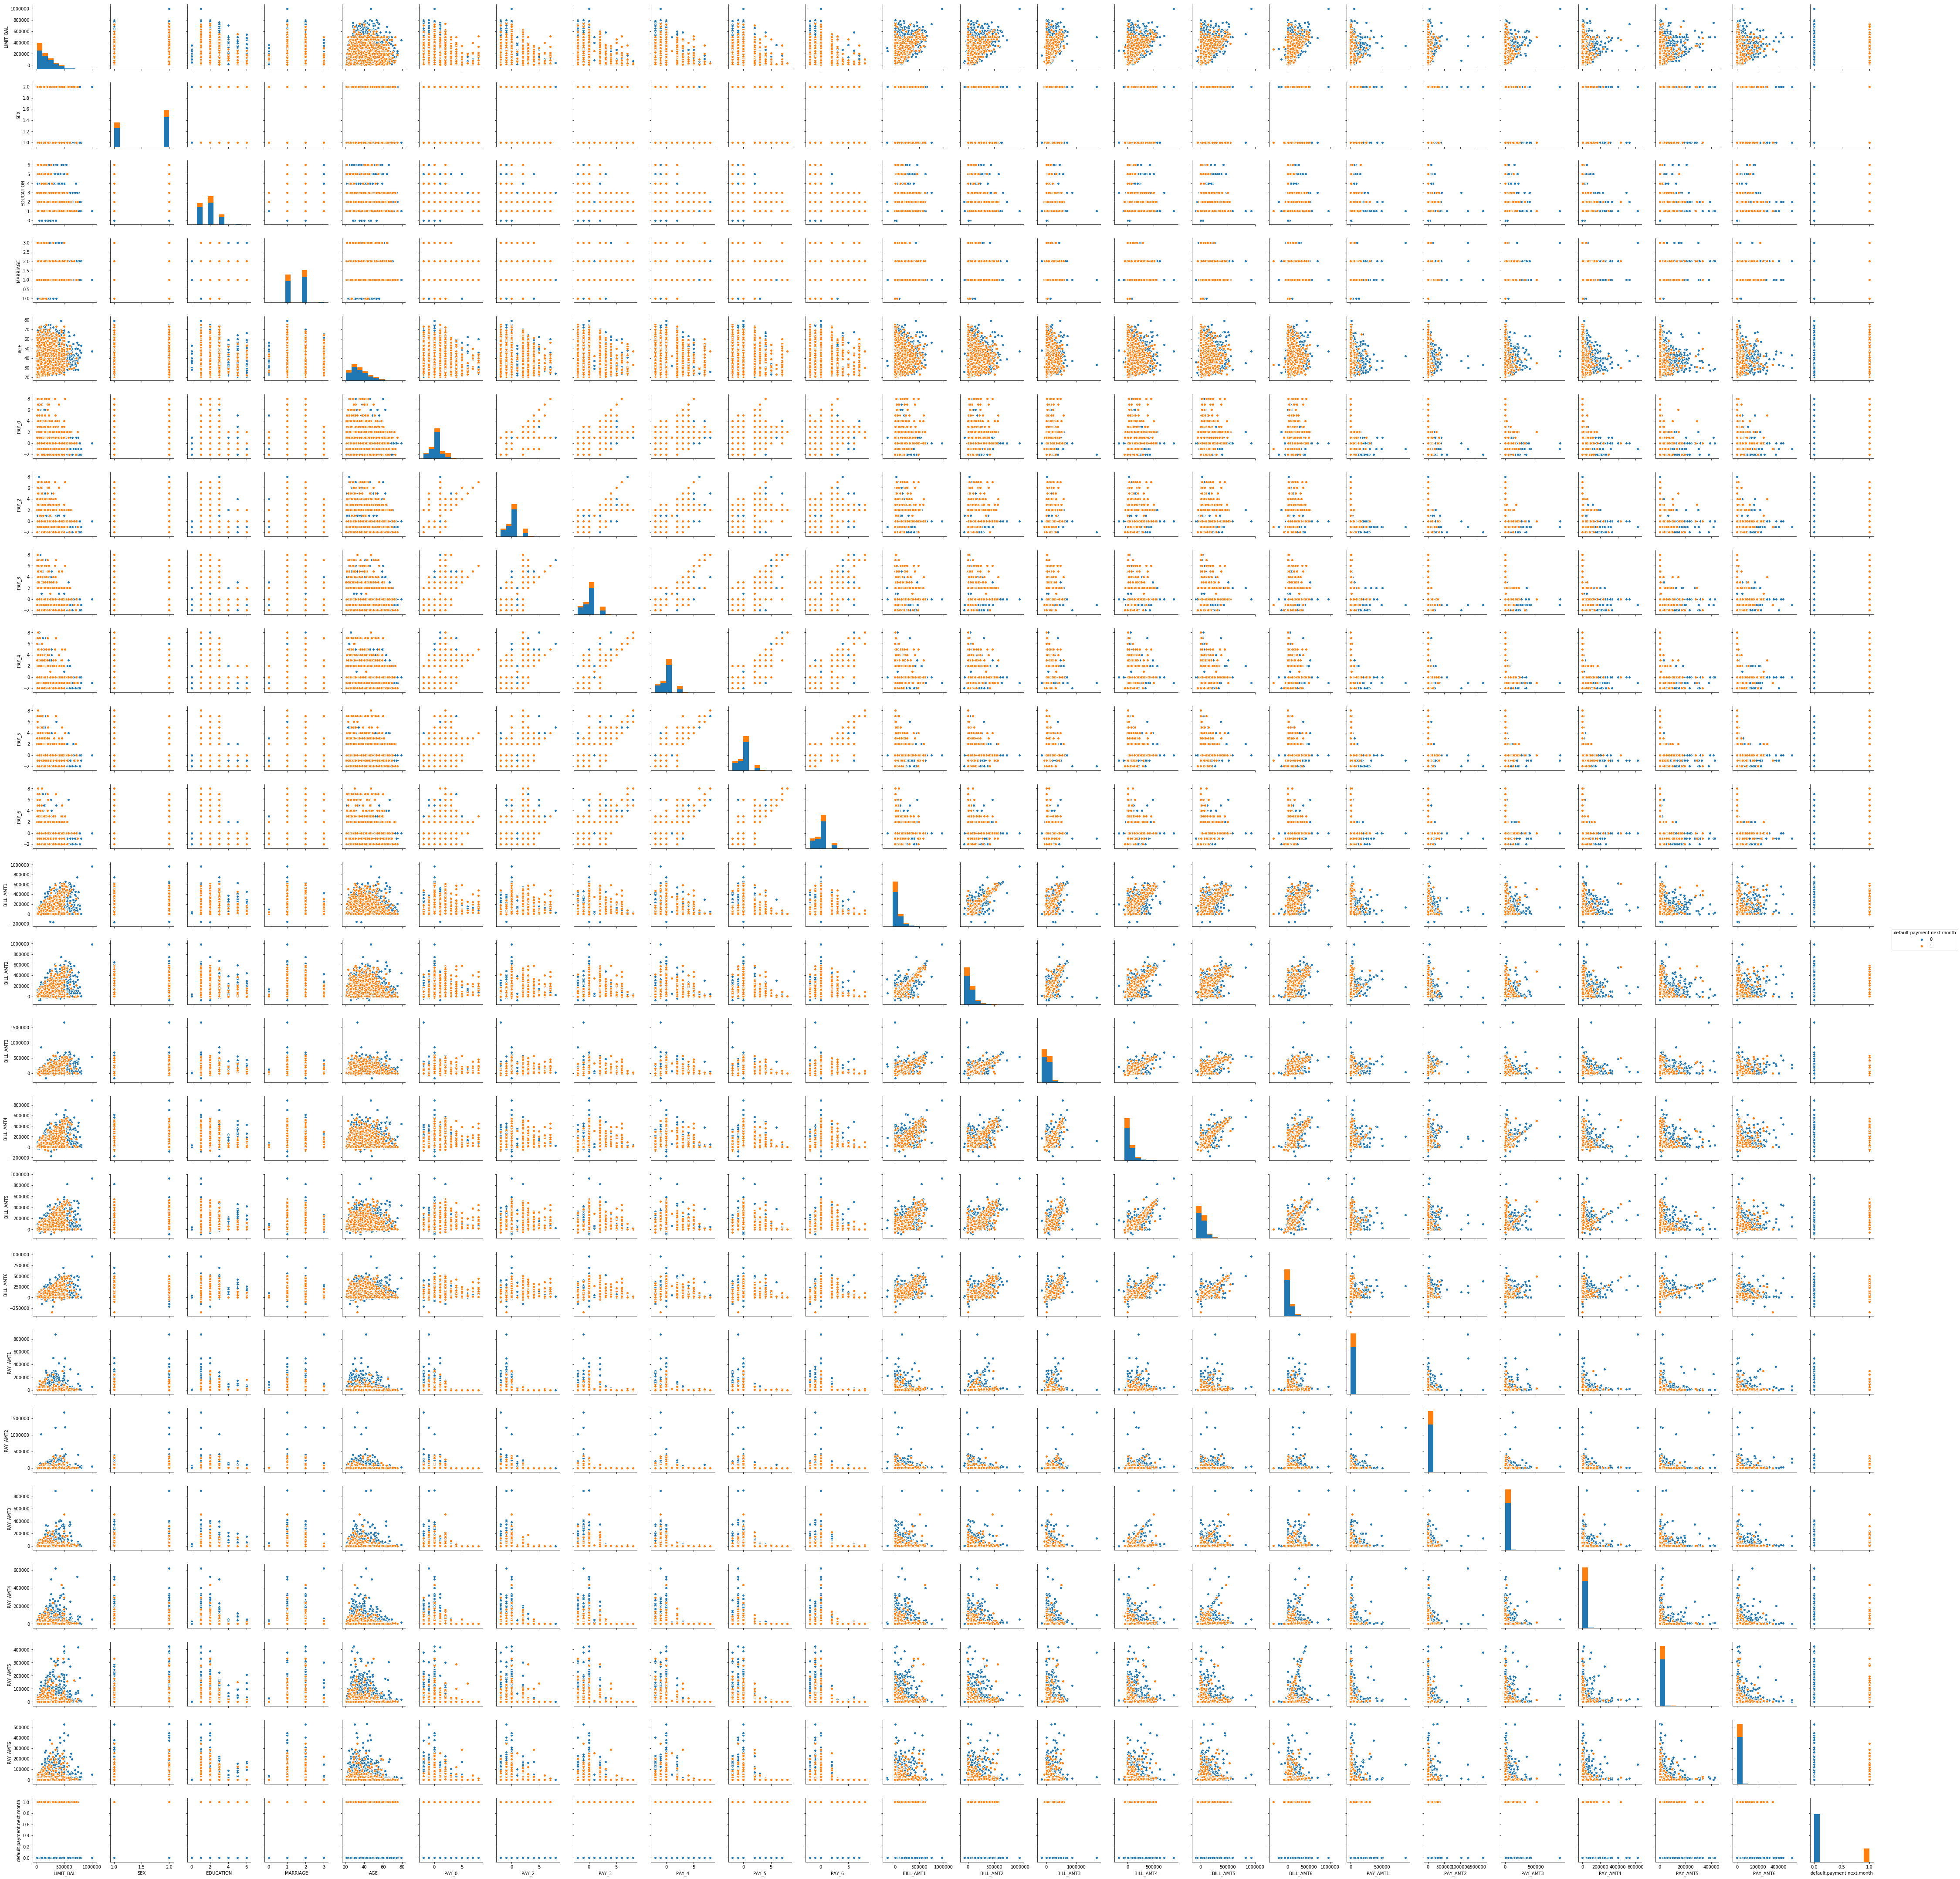

In [297]:
sns.pairplot(df_numeric, hue='default.payment.next.month');